In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression, Regularized Regression with Cross Validation on Gapminder Dataset

In [3]:
df=pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [11]:
X=df.drop('fertility',axis=1)
y=df['fertility']

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   HIV              139 non-null    float64
 2   CO2              139 non-null    float64
 3   BMI_male         139 non-null    float64
 4   GDP              139 non-null    float64
 5   BMI_female       139 non-null    float64
 6   life             139 non-null    float64
 7   child_mortality  139 non-null    float64
 8   Region           139 non-null    object 
dtypes: float64(8), object(1)
memory usage: 9.9+ KB


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   HIV              139 non-null    float64
 2   CO2              139 non-null    float64
 3   BMI_male         139 non-null    float64
 4   GDP              139 non-null    float64
 5   BMI_female       139 non-null    float64
 6   life             139 non-null    float64
 7   child_mortality  139 non-null    float64
 8   Region           139 non-null    object 
dtypes: float64(8), object(1)
memory usage: 9.9+ KB


In [14]:
#Converting Object(string) to numerical variable
X=pd.get_dummies(X,columns=['Region'],drop_first=True)

In [15]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=21)

In [16]:
#scaling using StandardScaler as features are not on the same scale
from sklearn.preprocessing import StandardScaler
ss_scaler=StandardScaler()
x_train=ss_scaler.fit_transform(X_train)
x_test=ss_scaler.transform(X_test)

In [17]:
#Traning the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.score(x_test,y_test) # This gives R square which is accuracy for linear regression

0.8500872452991709

In [23]:
y_pred=lr.predict(x_test)

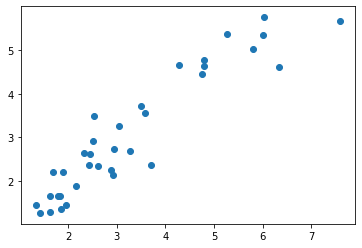

In [24]:
plt.scatter(y_test,y_pred)
plt.show()

In [19]:
#Scaling X before appling Cross Validation
x_scaled=StandardScaler().fit_transform(X)

In [20]:
#If we don't mention randon state while splitting, the accuracy which is R square values varies for different train test splits
#so in which manner the train test split happens if we want the accuracy to be around some normal value then we need to test the
#R square value with different splits. For this no need to apply for loop, we have method called Cross Validation in sklearn.
from sklearn.model_selection import cross_val_score # Cross validation can be applied in any classification and Regression models
cvs=cross_val_score(lr,x_scaled,y,cv=5)
cvs

array([0.95006051, 0.88509633, 0.83341491, 0.83093602, 0.85702012])

In [21]:
np.mean(cvs)

0.8713055785033388

# Regularized Regression

In [25]:
#LASSO Regularized Regression
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.4)
lasso.fit(x_train,y_train)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [26]:
lasso.score(x_test,y_test)

0.7149817081414325

In [27]:
y_pred=lasso.predict(x_test)

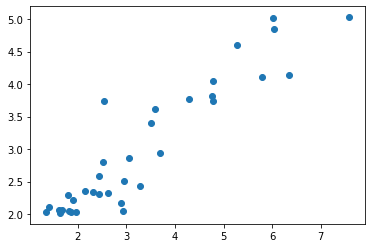

In [28]:
plt.scatter(y_test,y_pred)
plt.show()

In [67]:
#Checking which columns are more important in the Dataset for target column
lasso.coef_

array([-0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.80274279, -0.        , -0.        ,
       -0.        , -0.        ,  0.28141183])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

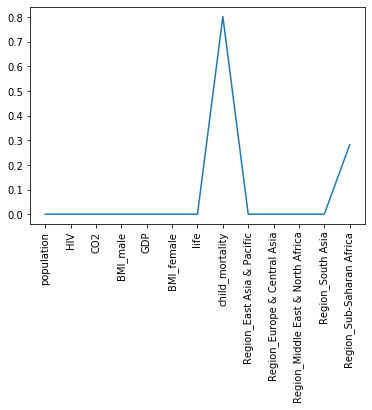

In [72]:
plt.plot(X.columns,lasso.coef_)
plt.xticks(rotation=90)

In [29]:
#Ridge Regularized Regression
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.4)
ridge.fit(x_train,y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
ridge.score(x_test,y_test)

0.8506952441830541

In [31]:
y_pred=ridge.predict(x_test)

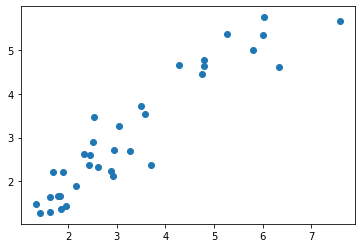

In [32]:
plt.scatter(y_test,y_pred)
plt.show()